In [2]:
# matpltlib 库以及参数
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

#其他的库
import numpy as np
import pandas as pd
import scipy as sp 
from scipy.optimize import leastsq
#封装进度条的函数
from tqdm import tqdm  

COLORLIST1=['#0404B4','#0000ff','#6E6E6E','#ff0000','#B40404']
COLORLIST2=['#0000ff','#0404B4','#000000','#B40404','#ff0000']
COLORLIST3=['#0052ad','#0074f5','#68aefc','#828282','#000000']
COLORLIST4=['#ff0000','#ff7474','#a9a9a9','#848484','#000000']
MARKERLIST=['o','v','x','^','s']


In [3]:
def My_Plot_g_mag(COLORLIST,bin_name):
    df=pd.read_csv('./DATA/%s_bin_in_redshift_bin_mean&err.csv'% bin_name,index_col=[0,1])
    #总图设置,准备画一个一行两列的对比图
#######################################################################################################################
    fig=plt.figure(figsize=(20,16))
    matplotlib.rcParams.update({'font.size': 18})

    #画左图，SDSS
    plt.subplot(2,2,1)
    #读入数据
    x1=[];y1=[];y1_err=[]
    for i in range(5):
        x1.append(df.loc[i]['REDSHIFT'])
        y1.append(df.loc[i]['g_SDSS'])
        y1_err.append(df.loc[i]['g_SDSS_err'])
    #图片设定
    plt.title('mag_g_SDSS in bin[%s]'%bin_name)
    plt.xlim(0,4)
    plt.ylim(22,18)
    plt.xlabel('redshift')
    plt.ylabel('mag_SDSS')
    #画errorbar图
    for i in range(5):
        plt.errorbar( x1[i],\
                      y1[i],\
                      y1_err[i],\
                      marker=MARKERLIST[i],\
                      capsize=2,\
                      color=COLORLIST[i],\
                      ls='',
                      label='%d%%-%d%%' %(i*20,i*20+1*20)+('--brightest'if i==0 else '--dimmist'if i==4 else '') );
    plt.legend();
######################################################################################################################
    #画右图，HSC
    plt.subplot(2,2,2)
    #读入数据
    x2=[];y2=[];y2_err=[]
    for i in range(5):
        x2.append(df.loc[i]['REDSHIFT'])
        y2.append(df.loc[i]['g_HSC'])
        y2_err.append(df.loc[i]['g_HSC_err'])
    #图片设定
    plt.title('mag_g_HSC in bin[%s]'%bin_name)
    plt.xlim(0,4)
    plt.ylim(22,18)
    plt.xlabel('redshift')
    plt.ylabel('mag_HSC')

    #画errorbar图
    for i in range(5):
        plt.errorbar( x2[i],\
                      y2[i],\
                      y2_err[i],\
                      marker=MARKERLIST[i],\
                      capsize=2,\
                      color=COLORLIST[i],\
                      ls='',
                      label='%d%%-%d%%' %(i*20,i*20+1*20)+('--brightest'if i==0 else '--dimmist'if i==4 else '') );
       # plt.legend();
###################################################################################################################
    plt.subplot(2,1,2)

    matplotlib.rcParams.update({'font.size': 18})
    #数据
    x=[]
    y=[];y_err=[]
    kg=[]
    bg=[]
    for i in range(5):
        x.append(df.loc[i]['REDSHIFT'])
        y.append(df.loc[i]['g_SDSS-HSC'])
        y_err.append(df.loc[i]['g_SDSS-HSC_err'])
    for i in range(5):
        #以kx+b来进行最小二乘拟合
        def residual(para):
            k,b=para
            return  y[i]-(k* x[i]+b)#额外定义函数能让谁是参量显得更直观
        result=sp.optimize.leastsq(residual,[0,0])
        k,b=result[0]
        #存进kg，kb
        kg.append(k)
        bg.append(b)
        #这决定是否显示拟合直线参数
        #print(kg[i],bg[i])

    #图片设定
    plt.title('mag_g_SDSS-HSC in bin[%s]'%bin_name)
    plt.xlim(0,4)
    plt.ylim()
    plt.xlabel('redshift')
    plt.ylabel('mag_g_SDSS-HSC')


    for i in range(5):
        #画errorbar图
        if i%4==0:
            plt.errorbar(x[i],\
                         y[i],\
                         y_err[i],\
                         marker=MARKERLIST[i],\
                         capsize=2,\
                         ls='',\
                         color=COLORLIST[i],\
                         label='%d%%-%d%%' %(i*20,i*20+1*20)+('--brightest'if i==0 else '--dimmist'if i==4 else '') );

        #画拟合直线
        x0=np.linspace(0,4)
        y0=kg[i]*x0+bg[i]
        plt.plot(x0,y0,linewidth=2,ls="--",color=COLORLIST[i]);
    #辅助直线
    x9=np.linspace(0,4,50)
    y9=0*x9
    plt.plot(x9,y9,color='black',linewidth=2);
    plt.legend();
    

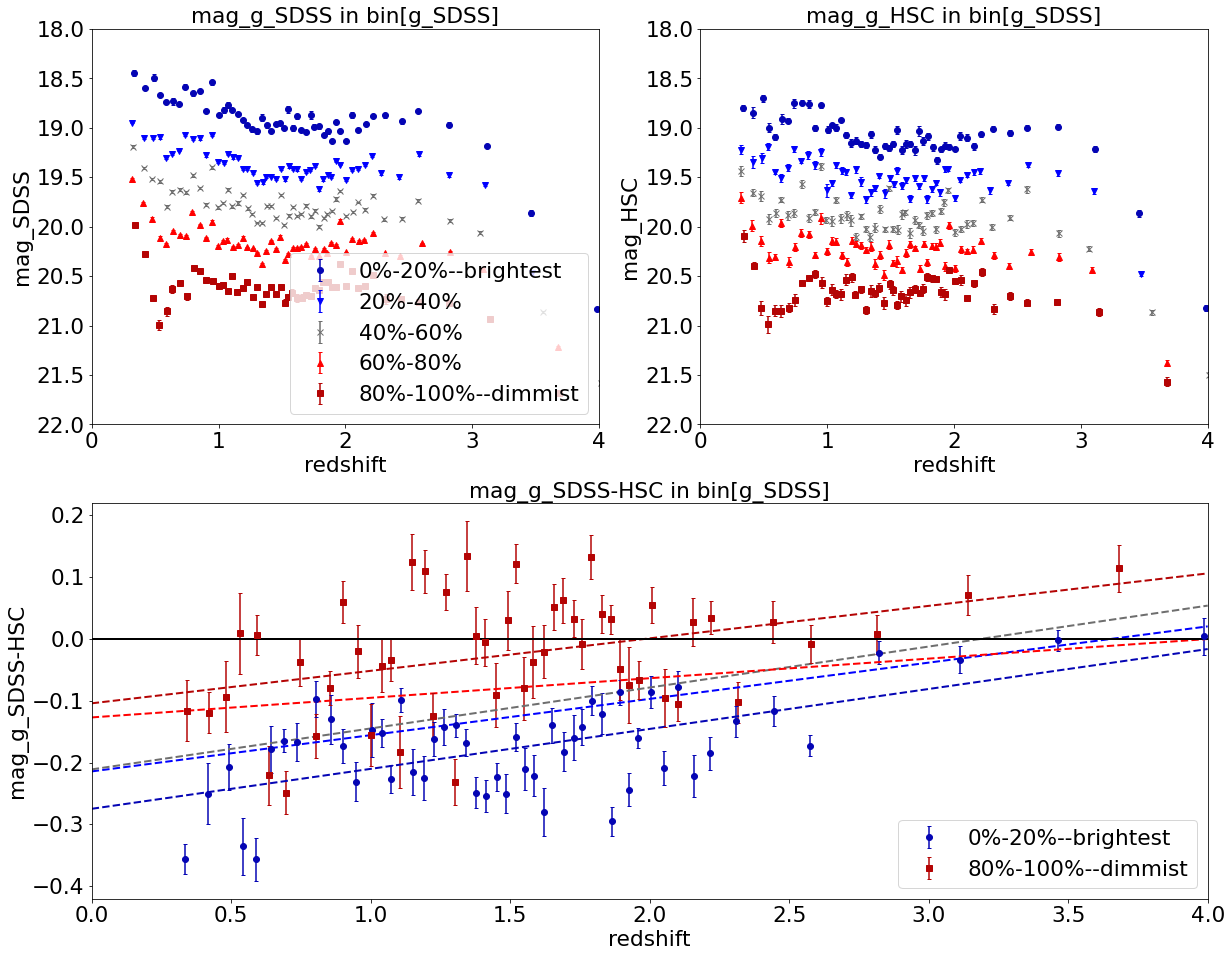

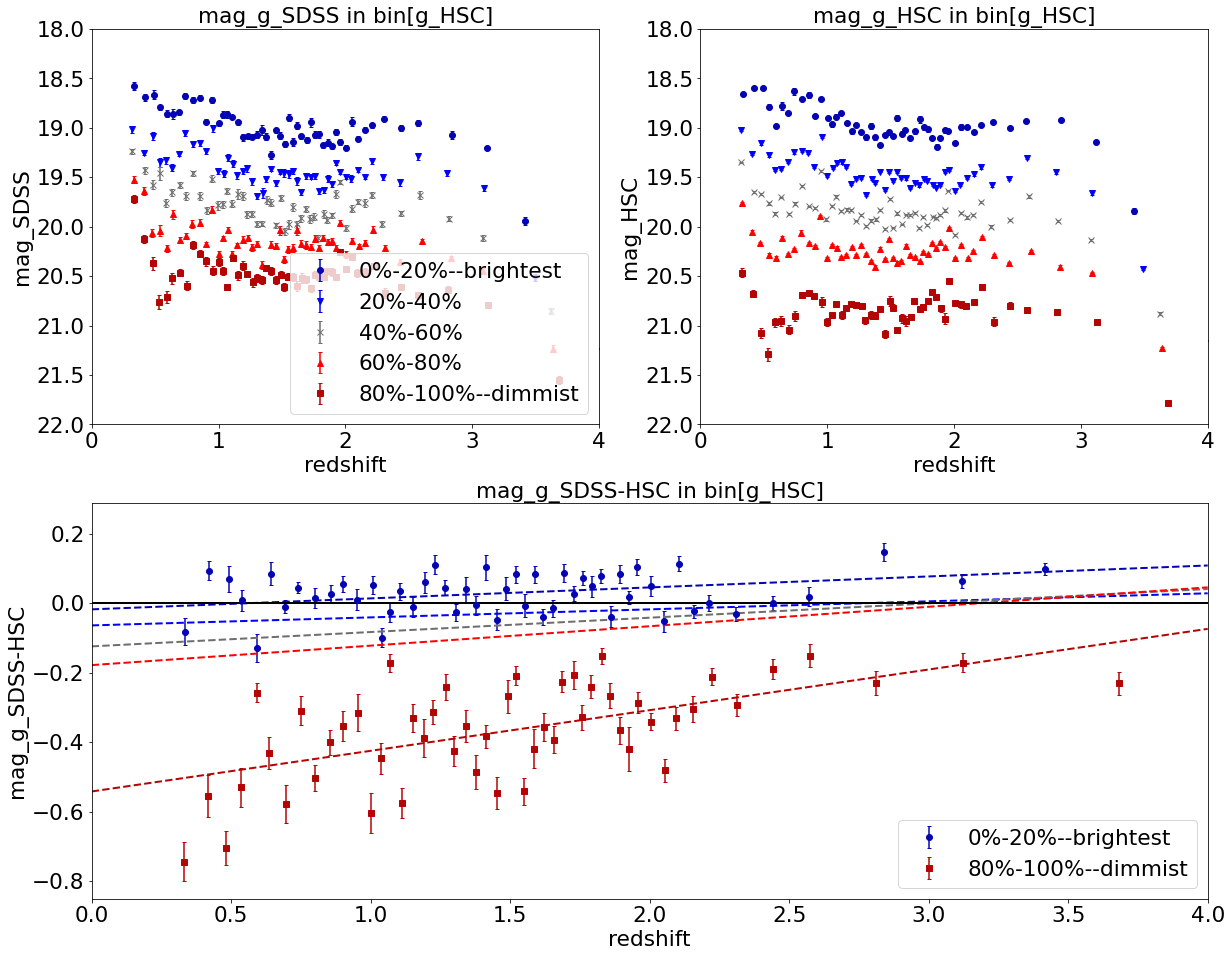

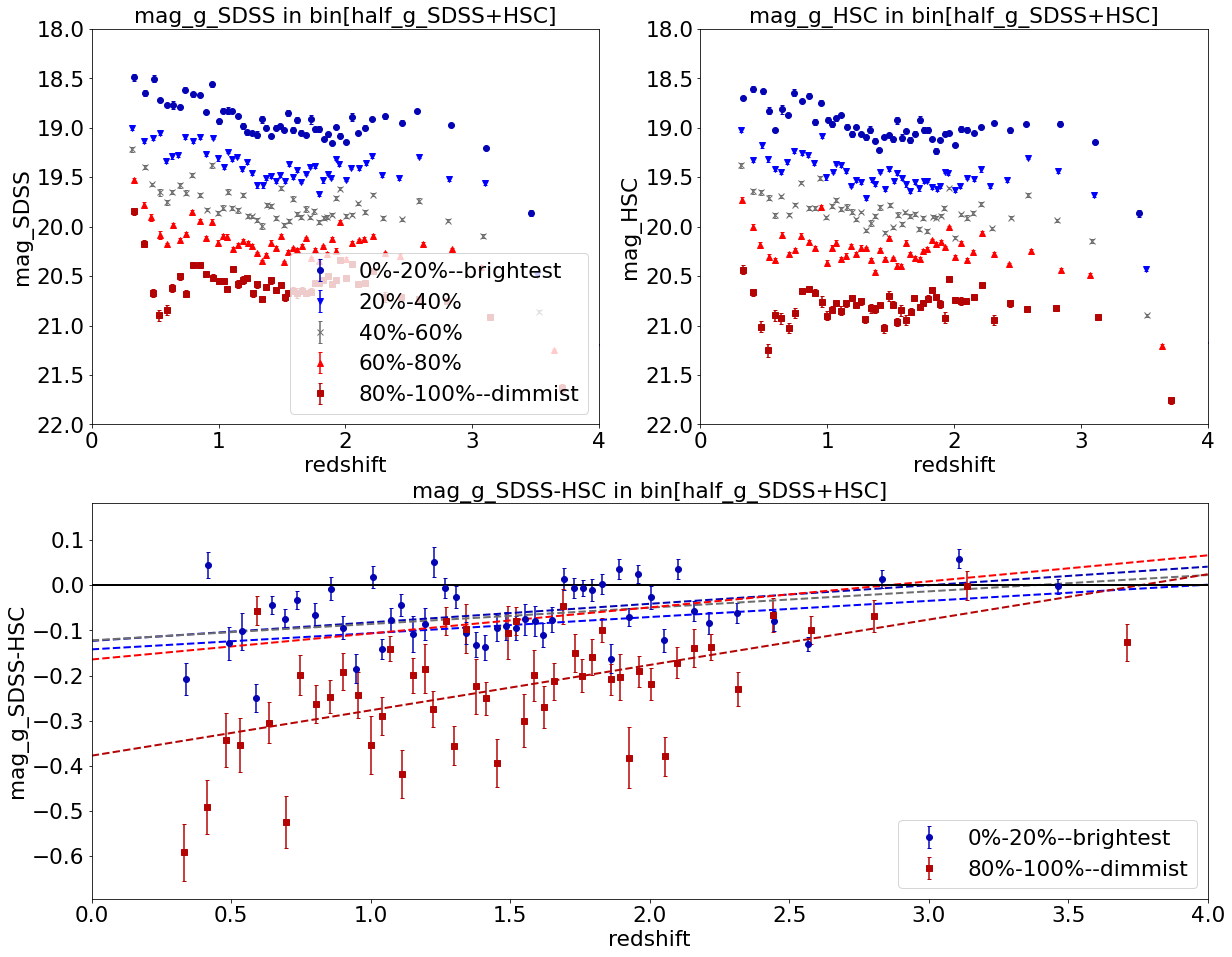

In [4]:
names=['g_SDSS','g_HSC','half_g_SDSS+HSC'];COLORLIST=COLORLIST1

for i in names:  
    My_Plot_g_mag(COLORLIST,i)

    plt.savefig('./FIGURES/2_1_fig_mag_bin_%s.pdf'%i)